# Import libraries and setup ultralytics

In [21]:
import os
os.chdir('/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new')
HOME = os.getcwd()

In [22]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Setup complete ✅ (12 CPUs, 16.0 GB RAM, 550.2/926.4 GB disk)


In [23]:
from ultralytics import YOLO
from IPython.display import display, Image

# Import roboflow training dataset

In [24]:
%cd {HOME}

!pip install roboflow --quiet

from roboflow import Roboflow
#rf = Roboflow(api_key="YLaFkVsHQi1TZJOSm4Ub")
#project = rf.workspace("minoj-selvaraj").project("furniture-sfocl")
#dataset = project.version(1).download("yolov8")

/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new


# Train model

In [25]:
# Need to change path in YAML file to dataset directory

%cd {HOME}

#!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=80 imgsz=800 plots=True
#!yolo task=detect mode=train model=yolov8n.pt data=/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/New_genders_yolov8/data.yaml epochs=15 imgsz=640 plots=True

# Use locally downloaded dataset and nano model
!yolo task=detect mode=train model=yolov8n.pt data=../Genders_new/data.yaml lr0=1e-5 lrf=1e-6 cache=True epochs=14 imgsz=640
plots=True

/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=../Genders_new/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=True, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

       6/20         0G     0.4923       1.15      1.037          3        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1493       1493      0.738      0.894      0.905      0.751
                Female       1493        924      0.834      0.833      0.925      0.754
                  Male       1493        569      0.642      0.954      0.885      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/20         0G     0.4855      1.093       1.03          6        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1493       1493      0.707      0.896      0.888      0.743
                Female       1493        924      0.737      0.896      0.897      0.746
                  Male       1493        569      0.676      0.896      0.878       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Insta

Speed: 1.0ms pre-process, 172.0ms inference, 0.0ms loss, 0.7ms post-process per image
Results saved to runs/detect/train13


In [6]:
!ls {HOME}/runs/detect/train/

args.yaml
events.out.tfevents.1679560583.MacBook-Pro-2.local.37659.0
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
weights


# Confusion matrix output

/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new


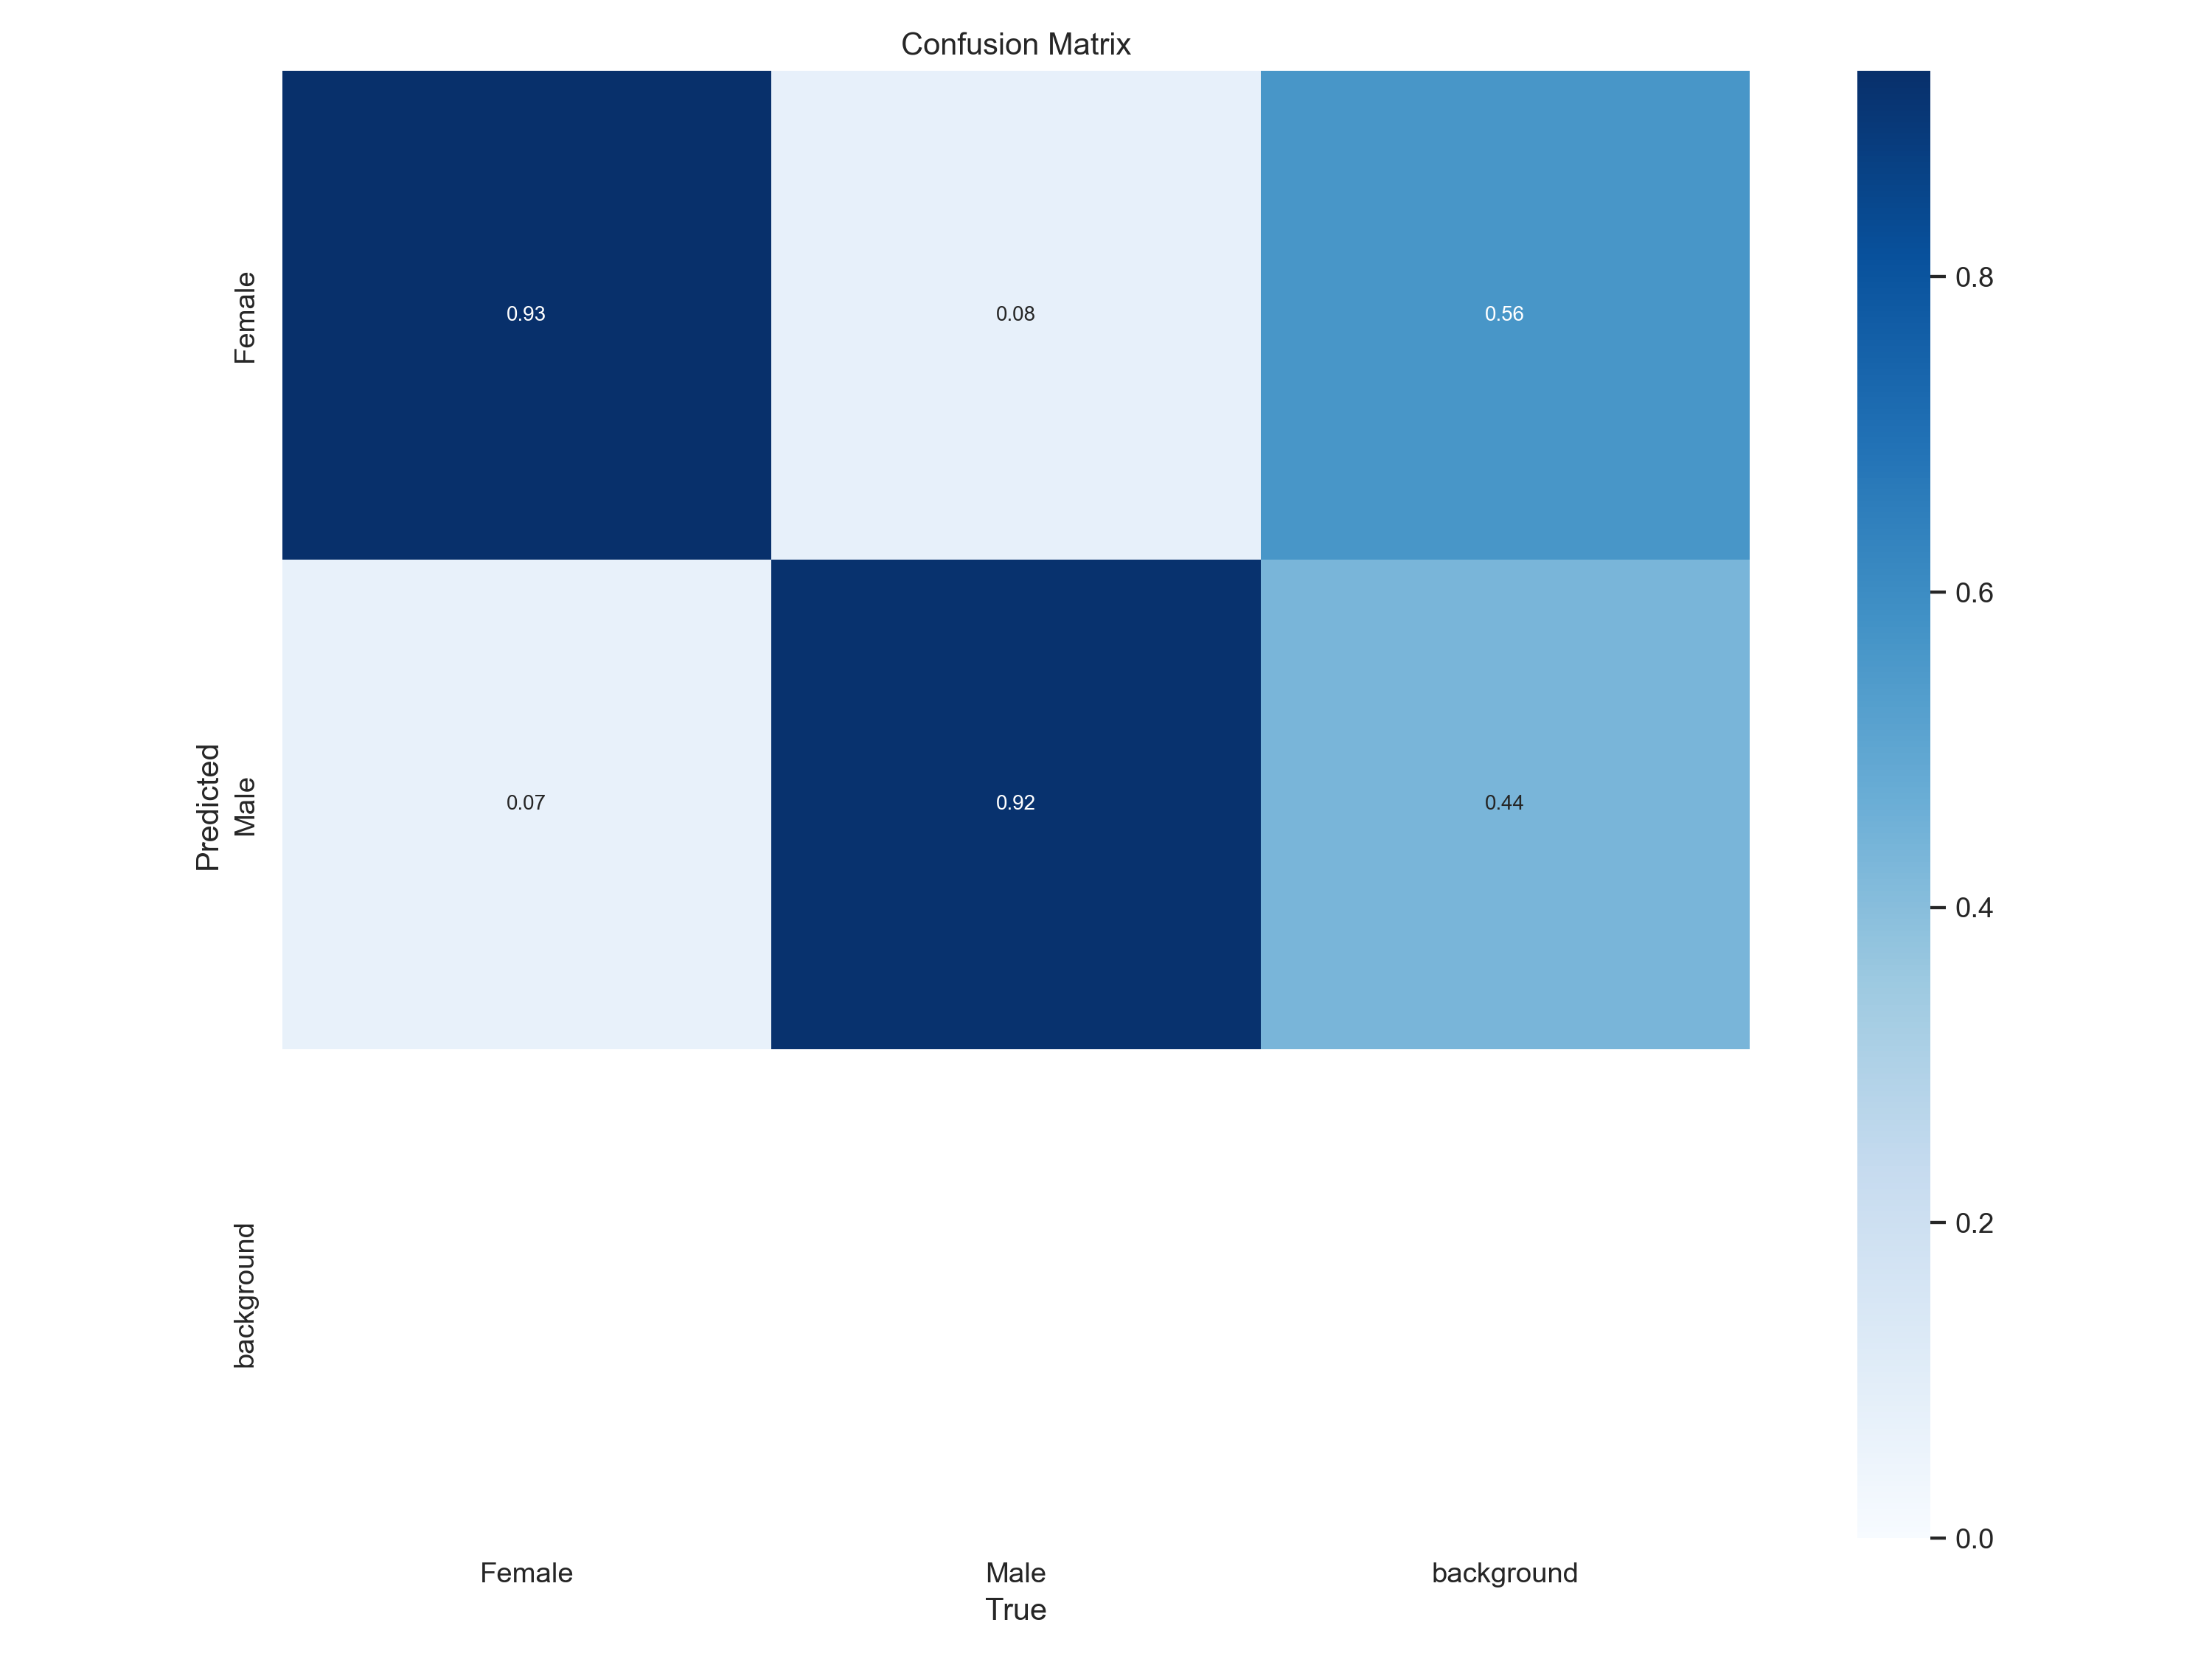

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train13/confusion_matrix.png', width=600)

# Loss and mAP (mean average precision) graphs

/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new


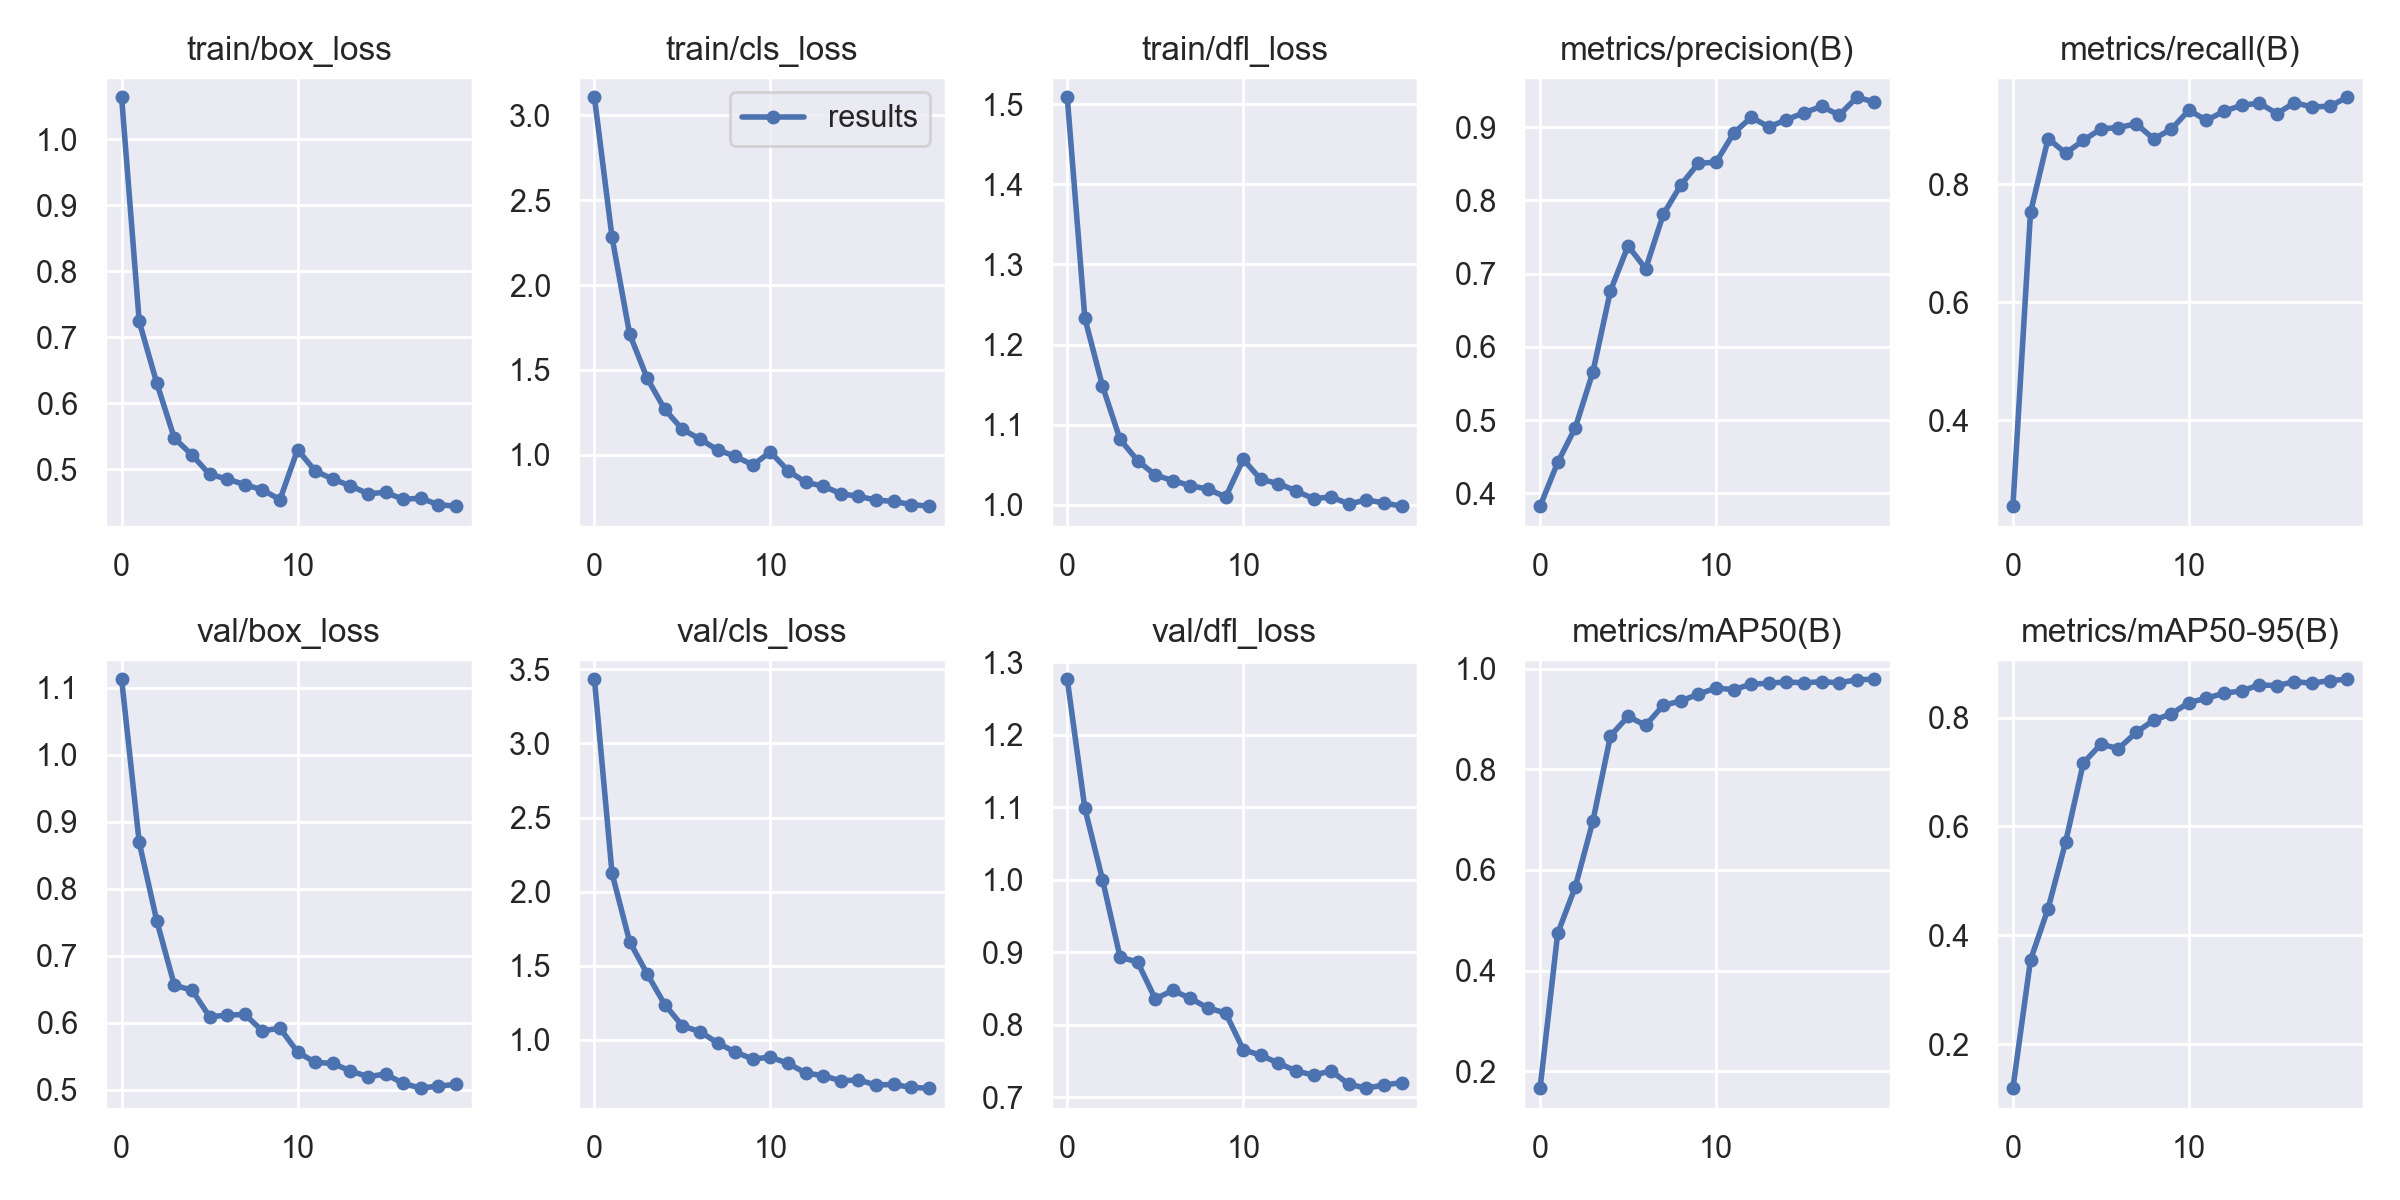

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train13/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train13/val_batch0_pred.jpg', width=600)

/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new


In [38]:
Image(filename=/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new/runs/detect/train13/val_batch1_pred.jpg, width=600)

#Image(filename=f'{HOME}/runs/detect/train13/val_batch1_pred.jpg', width=600)

SyntaxError: invalid syntax (1610609634.py, line 1)

# Validate custom model

In [32]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train13/weights/best.pt data=/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new/data.yaml

/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new/va
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1493       1493      0.934      0.949      0.979      0.871
                Female       1493        924      0.941      0.959      0.984       0.85
                  Male       1493        569      0.928      0.938      0.974      0.891
Speed: 0.4ms pre-process, 184.3ms inference, 0.0ms loss, 0.7ms post-process per image


# Inference with custom model

In [39]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train13/weights/best.pt conf=0.25 source=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/Genders_new/test/images save=True

#!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
#project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

/Users/veesheenyuen/code/NwayEi/virtual_vision/Data/Genders_new
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
Traceback (most recent call last):
  File "/Users/veesheenyuen/.pyenv/versions/virtual_vision/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/Users/veesheenyuen/.pyenv/versions/3.10.6/envs/virtual_vision/lib/python3.10/site-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/Users/veesheenyuen/.pyenv/versions/3.10.6/envs/virtual_vision/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/Users/veesheenyuen/.pyenv/versions/3.10.6/envs/virtual_vision/lib/python3.10/site-packages/ultralytics/yolo/engine/model.py", line 146, in predict
    return self.predictor(source=source, stream=stream, verbose=verbose)
  File "/Users/ve

# Inference results

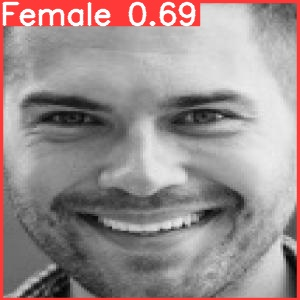

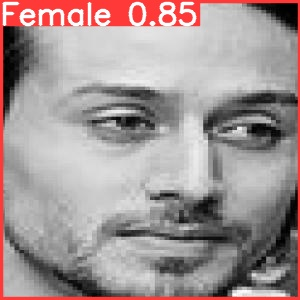

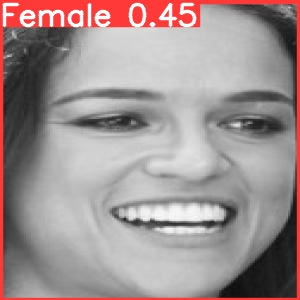

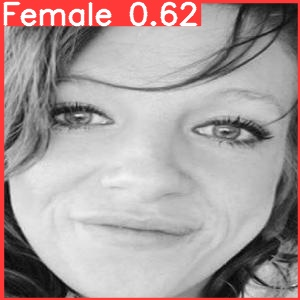

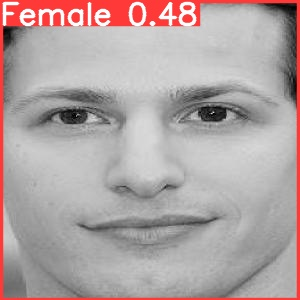

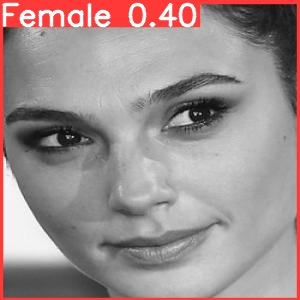

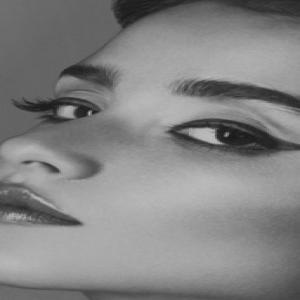

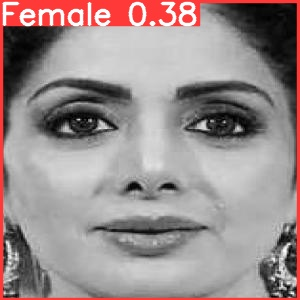

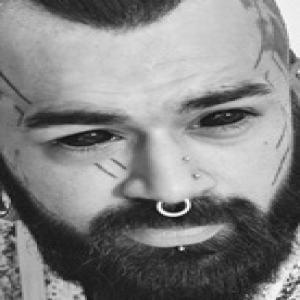

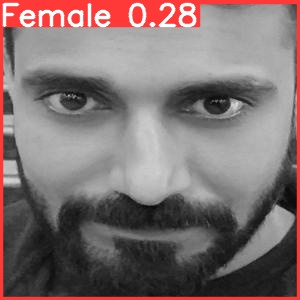

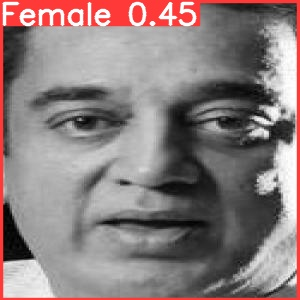

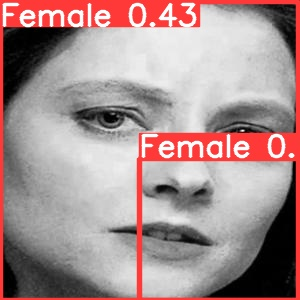

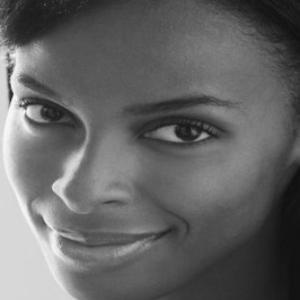

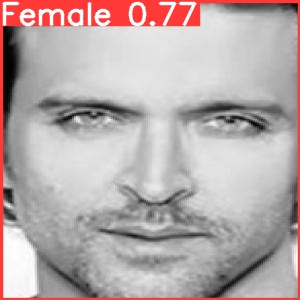

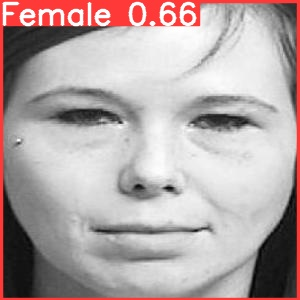

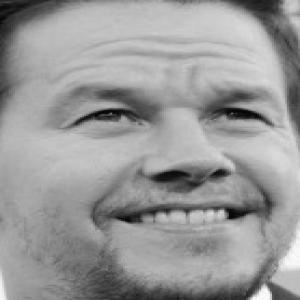

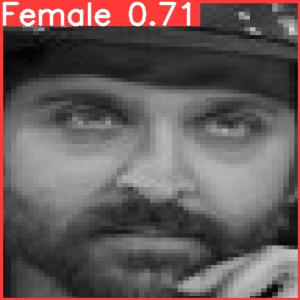

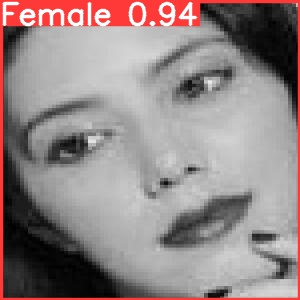

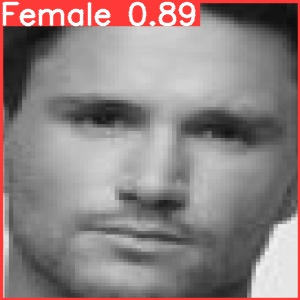

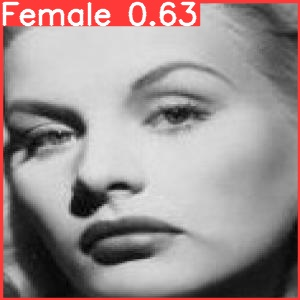

In [35]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[50:70]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Deploy model

In [9]:
#project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [8]:
!yolo export model={HOME}/runs/detect/train5/weights/best.pt format=torchscript


Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.0 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.pt with output shape (1, 6, 13125) (6.0 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 0.8s, saved as /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.torchscript (11.9 MB)

Export complete (1.1s)
Results saved to /Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights
Predict:         yolo task=detect mode=predict model=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.torchscript -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=/Users/veesheenyuen/code/NwayEi/virtual_vision/datasets/runs/detect/train5/weights/best.torchscript -WARNING ⚠️ not yet s